# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [3]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [4]:
df_apps.shape

(10841, 12)

In [5]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [6]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
424,FK (FlightKid),GAME,NaN,2,22.00,10,Free,0,Everyone,Action,"March 3, 2016",4.0 and up
9929,Rider,GAME,4.50,655067,72.00,"10,000,000",Free,0,Teen,Arcade,"July 17, 2017",4.0.3 and up
1980,Call Blocker & Blacklist,COMMUNICATION,4.00,6,4.20,"1,000",Free,0,Everyone,Communication,"July 13, 2018",4.0 and up
6166,Nedbank Money,FINANCE,4.20,6076,32.00,"500,000",Free,0,Everyone,Finance,"July 28, 2018",4.2 and up
4791,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.90,10479,33.00,"100,000",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",4.0 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [7]:
df_apps.drop(["Last_Updated","Android_Ver"], axis=1, inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [8]:
df_apps.isna().shape

(10841, 10)

In [9]:
df_apps_clean = df_apps.dropna()
print(df_apps_clean.shape)
df_apps_clean.head()

(9367, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [10]:
df_apps_clean.duplicated()

21       False
28       False
47       False
82       False
99       False
         ...  
10836    False
10837    False
10838    False
10839     True
10840    False
Length: 9367, dtype: bool

In [11]:
n=df_apps_clean[df_apps_clean.duplicated()]
print(n.shape)
n.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [12]:
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [13]:
test= df_apps_clean.drop_duplicates()
test[test.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [14]:
df_apps_clean = df_apps_clean.drop_duplicates(subset = ["App","Category","Rating"])
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [15]:
n=df_apps_clean["Rating"].max()
print(n)
df_apps_clean[df_apps_clean.Rating==n]

5.0


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
2680,Florida Wildflowers,FAMILY,5.00,5,69.00,"1,000",Free,0,Everyone,Education
2750,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.00,34,12.00,"5,000",Free,0,Everyone,Comics
3030,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.00,24,3.20,"5,000",Free,0,Everyone,Tools
3115,Oración CX,LIFESTYLE,5.00,103,3.80,"5,000",Free,0,Everyone,Lifestyle


In [16]:
df_apps_clean.sort_values("Rating", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography
1214,BV Mobile Apps,PRODUCTIVITY,5.00,3,4.80,100,Free,0,Everyone,Productivity
1206,ADS-B Driver,TOOLS,5.00,2,6.30,100,Paid,$1.99,Everyone,Tools
1183,Railroad Radio Vancouver BC,FAMILY,5.00,4,1.70,100,Free,0,Teen,Entertainment


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [17]:
df_apps_clean.sort_values("Size_MBs", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
8718,Mini Golf King - Multiplayer Game,GAME,4.50,531458,100.00,"5,000,000",Free,0,Everyone,Sports
8719,Draft Simulator for FUT 18,SPORTS,4.60,162933,100.00,"5,000,000",Free,0,Everyone,Sports
7926,Post Bank,FINANCE,4.50,60449,100.00,"1,000,000",Free,0,Everyone,Finance
1795,Navi Radiography Pro,MEDICAL,4.70,11,100.00,500,Paid,$15.99,Everyone,Medical
4176,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.60,151,100.00,"10,000",Free,0,Everyone,Racing


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [18]:
df_apps_clean.sort_values("Reviews", ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10653,Clash of Clans,FAMILY,4.60,44881447,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [19]:
ratings=df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           6677
Teen                933
Mature 17+          357
Everyone 10+        319
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

C:\Users\Deleo Anangfac\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


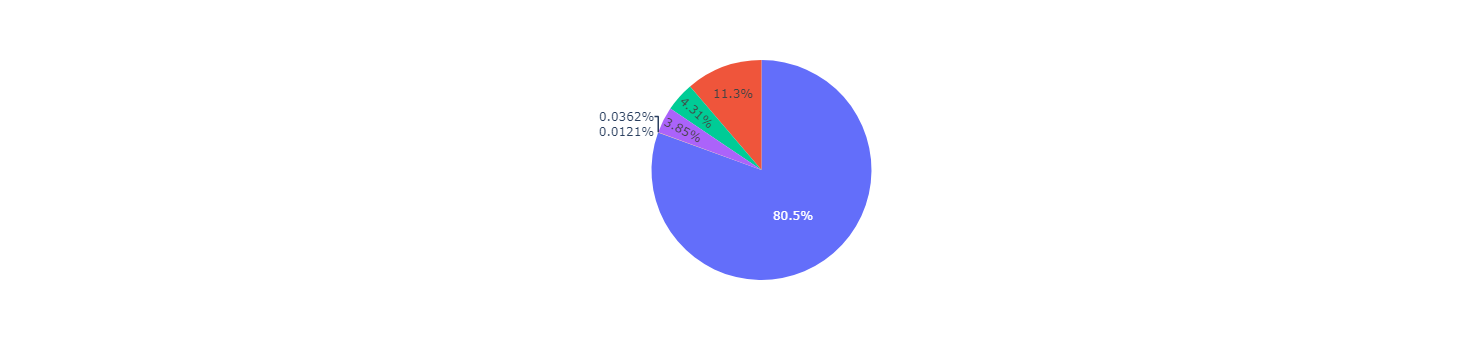

In [20]:
fig=px.pie(labels=ratings.index, values=ratings.values)
fig.show()

C:\Users\Deleo Anangfac\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



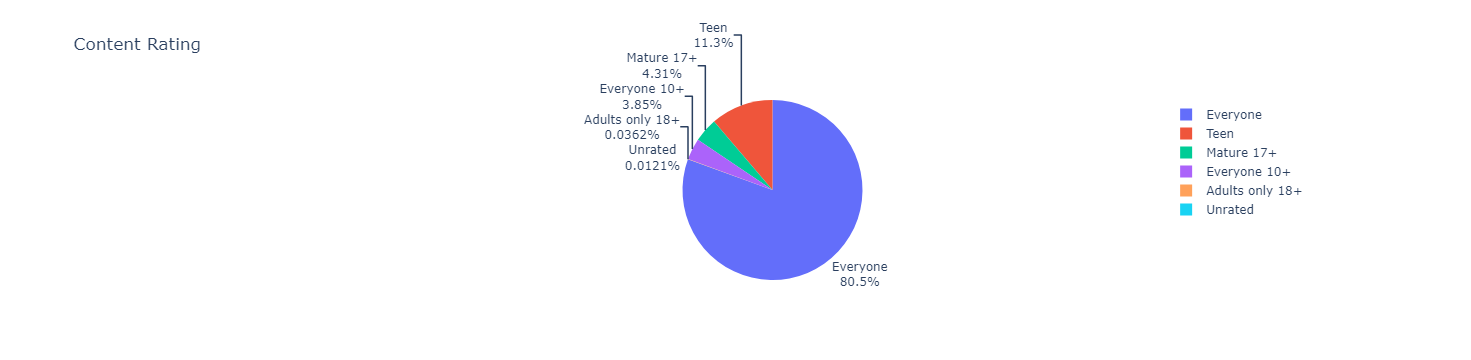

In [21]:
fig=px.pie(labels=ratings.index, values=ratings.values, title="Content Rating", names=ratings.index)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

C:\Users\Deleo Anangfac\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



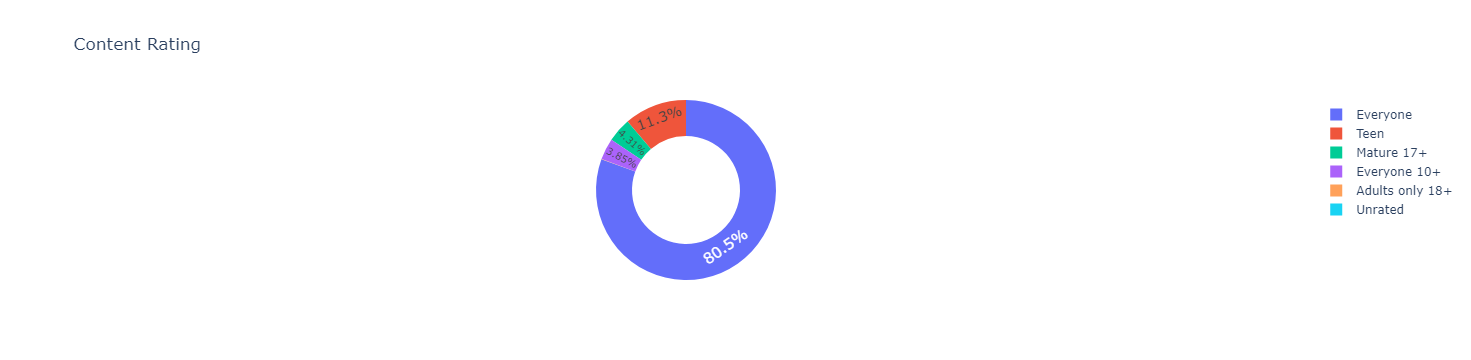

In [22]:
fig=px.pie(labels=ratings.index, values=ratings.values, title="Content Rating", names=ratings.index, hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=15)
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [23]:
df_apps_clean["Installs"].describe()

count          8290
unique           19
top       1,000,000
freq           1428
Name: Installs, dtype: object

In [24]:
# OR
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8290 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8290 non-null   object 
 1   Category        8290 non-null   object 
 2   Rating          8290 non-null   float64
 3   Reviews         8290 non-null   int64  
 4   Size_MBs        8290 non-null   float64
 5   Installs        8290 non-null   object 
 6   Type            8290 non-null   object 
 7   Price           8290 non-null   object 
 8   Content_Rating  8290 non-null   object 
 9   Genres          8290 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 712.4+ KB


In [25]:
df_apps_clean.groupby("Installs")["App"].count()

Installs
1                   3
1,000             699
1,000,000        1428
1,000,000,000      21
10                 69
10,000            988
10,000,000        963
100               303
100,000          1098
100,000,000       204
5                   9
5,000             425
5,000,000         621
50                 56
50,000            457
50,000,000        211
500               199
500,000           509
500,000,000        27
Name: App, dtype: int64

In [26]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")

In [27]:
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,699
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [28]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace("$", "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
df_apps_clean.sort_values("Price", ascending=False).head(20)

C:\Users\Deleo Anangfac\AppData\Local\Temp\ipykernel_13940\4183103086.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
2394,I am Rich!,FINANCE,3.80,93,22.00,1000,Paid,399.99,Everyone,Finance
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
1331,most expensive app (H),FAMILY,4.30,6,1.50,100,Paid,399.99,Everyone,Entertainment


### The most expensive apps sub $250

In [29]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
4264,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25.00,50000,Paid,29.99,Everyone,Sports
504,AP Art History Flashcards,FAMILY,5.00,1,96.00,10,Paid,29.99,Mature 17+,Education
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical
2207,EMT PASS,MEDICAL,3.40,51,2.40,1000,Paid,29.99,Everyone,Medical
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.50,2921,25.00,100000,Paid,24.99,Everyone,Medical
3241,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.20,168,25.00,10000,Paid,24.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [30]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
print(df_apps_clean.shape)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

(8275, 11)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"
6856,Threema,COMMUNICATION,4.50,51110,3.50,1000000,Paid,2.99,Everyone,Communication,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [31]:
df_apps_clean.Category.nunique()

33

In [32]:
top15_category = df_apps_clean.Category.value_counts()[:15]
top15_category

FAMILY                1680
GAME                   914
TOOLS                  721
PRODUCTIVITY           301
PERSONALIZATION        298
LIFESTYLE              297
FINANCE                296
MEDICAL                293
PHOTOGRAPHY            265
BUSINESS               263
SPORTS                 262
COMMUNICATION          257
HEALTH_AND_FITNESS     244
NEWS_AND_MAGAZINES     204
SOCIAL                 203
Name: Category, dtype: int64

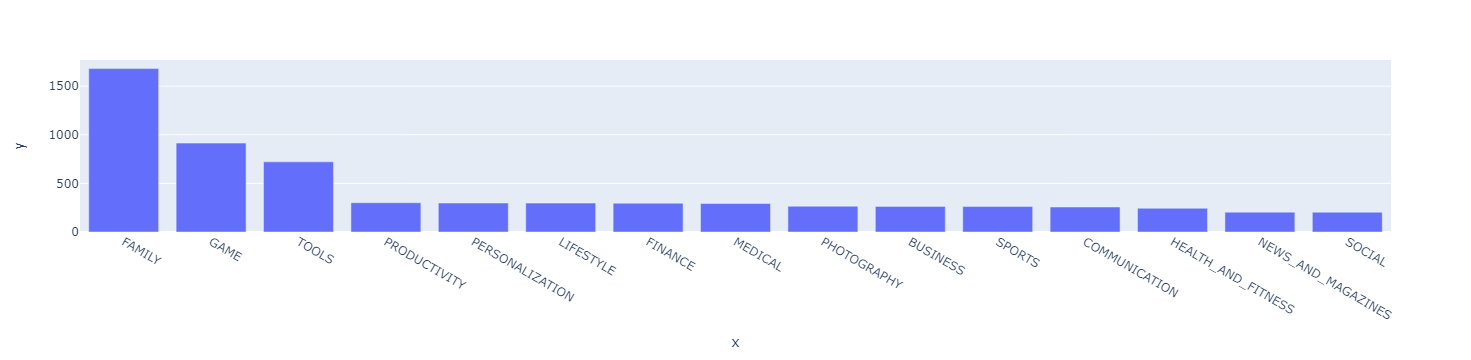

In [33]:
bar = px.bar(x = top15_category.index, # index = category name
            y = top15_category.values)
bar.show()

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [34]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)
category_installs

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39262676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

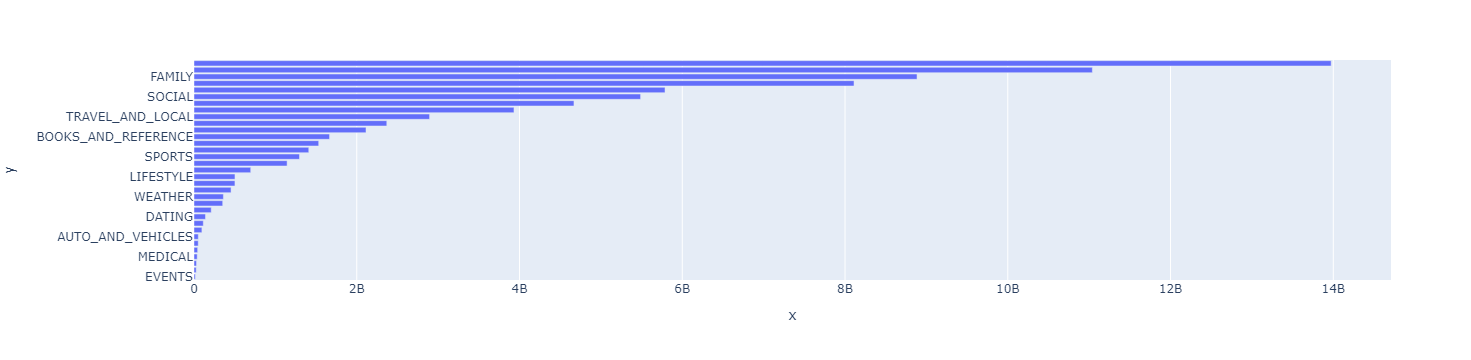

In [35]:
h_bar = px.bar(x = category_installs.Installs, y = category_installs.index, orientation='h')

h_bar.show()

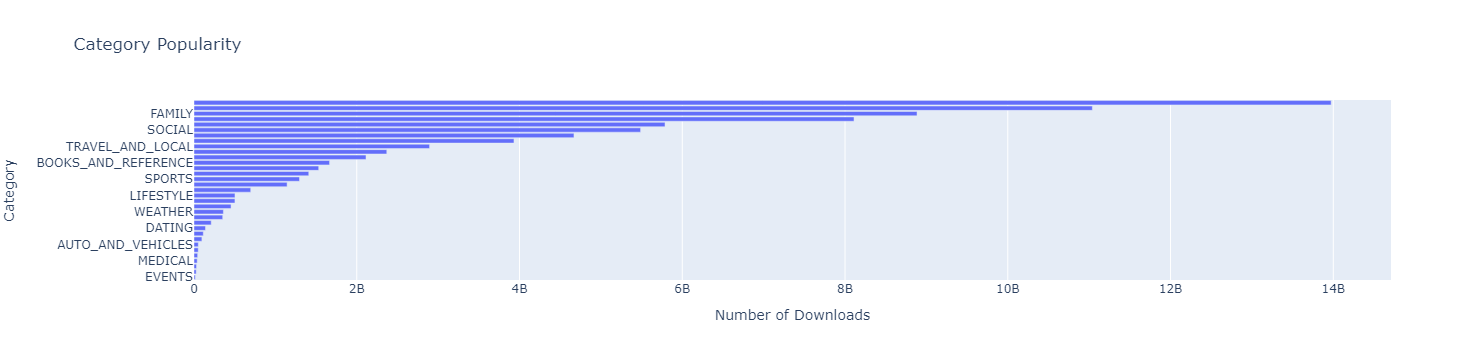

In [36]:
h_bar = px.bar(x = category_installs.Installs, y = category_installs.index, orientation='h', title='Category Popularity')

h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [37]:
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})
cat_number

,App
Category,
ART_AND_DESIGN,61
AUTO_AND_VEHICLES,73
BEAUTY,42
BOOKS_AND_REFERENCE,169
BUSINESS,263
COMICS,54
COMMUNICATION,257
DATING,134
EDUCATION,118


In [38]:
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)
cat_merged_df

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
ART_AND_DESIGN,61,114233100
AUTO_AND_VEHICLES,73,53129800
BEAUTY,42,26916200
BOOKS_AND_REFERENCE,169,1665791655
BUSINESS,263,697018120
COMICS,54,44931100
COMMUNICATION,257,11039241530
DATING,134,140912410
EDUCATION,118,352852000


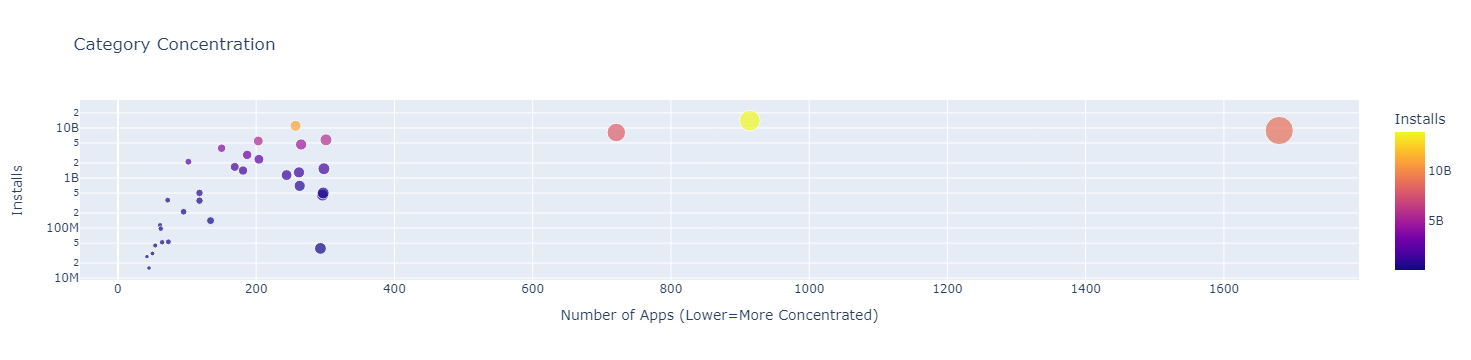

In [39]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')

scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                    yaxis_title="Installs",
                    yaxis=dict(type='log'))

scatter.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [40]:
# Split the strings on the semi-colon and then .stack them.
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8681,)
Number of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

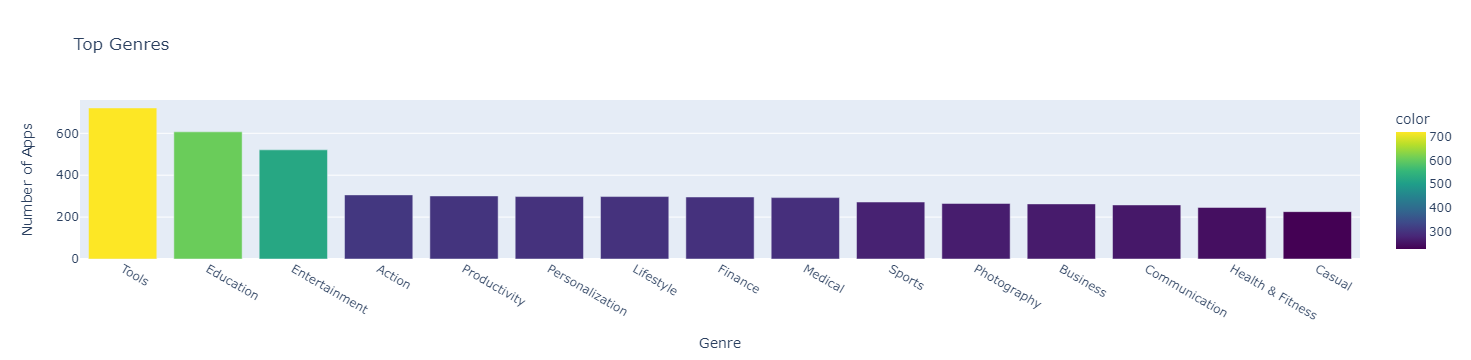

In [41]:
bar = px.bar(x = num_genres.index[:15], # index = category name
            y = num_genres.values[:15], # count
            title='Top Genres',
            hover_name=num_genres.index[:15],
            color=num_genres.values[:15],
            color_continuous_scale='viridis')

bar.update_layout(xaxis_title='Genre', yaxis_title='Number of Apps', coloraxis_showscale=True)

bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [42]:
df_apps_clean.Type.value_counts()

Free    7684
Paid     591
Name: Type, dtype: int64

In [43]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head(6)

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
5,BOOKS_AND_REFERENCE,Free,161


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

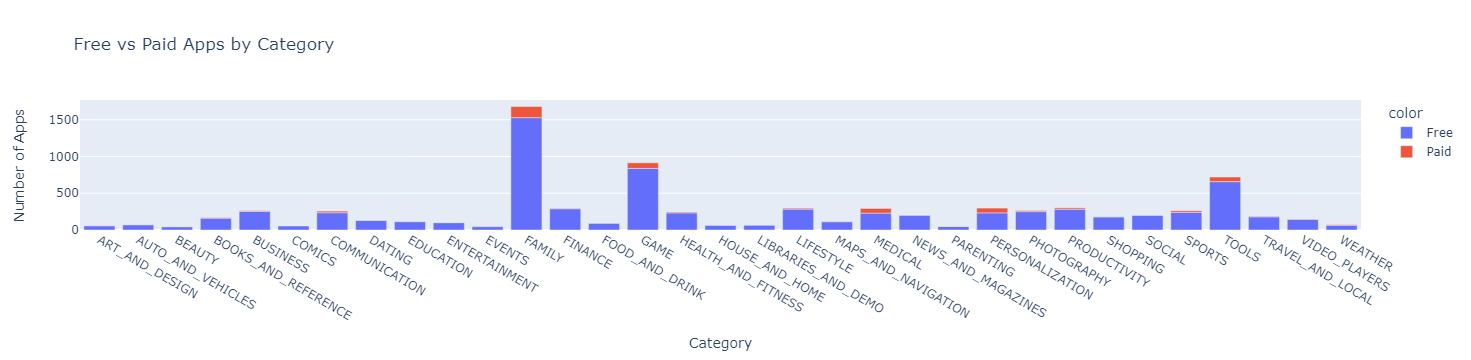

In [44]:
from matplotlib import category


fvp=px.bar(x=df_free_vs_paid.Category, y=df_free_vs_paid.App, title='Free vs Paid Apps by Category', hover_name=df_free_vs_paid.index, color=df_free_vs_paid.Type)

fvp.update_layout(xaxis_title='Category', yaxis_title='Number of Apps', coloraxis_showscale=True)

fvp.show()

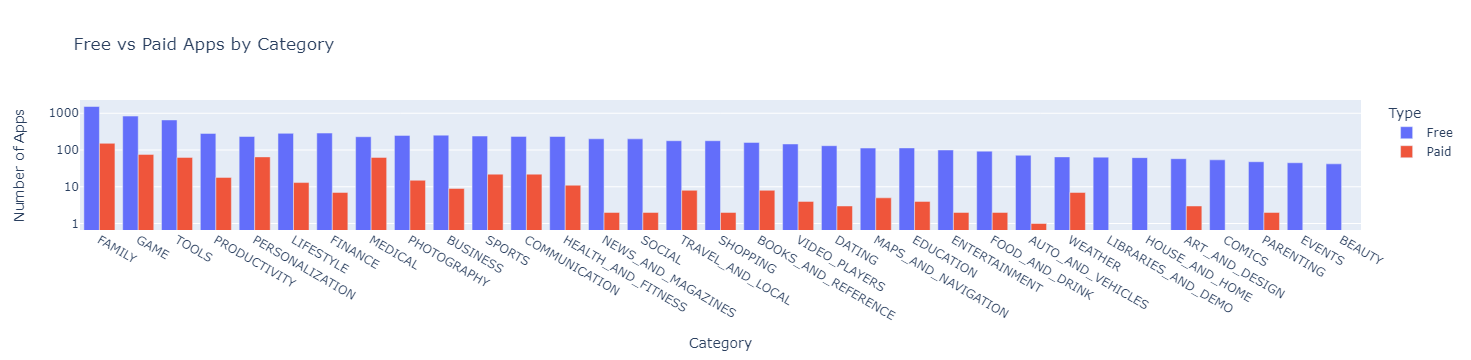

In [54]:
# Correct Answer
g_bar = px.bar(df_free_vs_paid, x='Category', y='App', title='Free vs Paid Apps by Category', color='Type', barmode='group')

g_bar.update_layout(xaxis_title='Category',  yaxis_title='Number of Apps', xaxis={'categoryorder':'total descending'}, yaxis=dict(type='log'))

g_bar.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


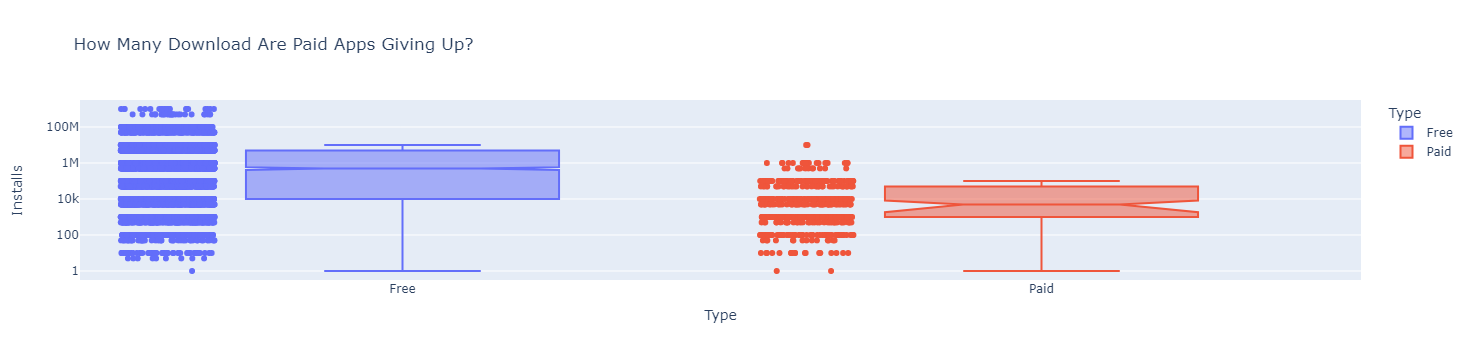

In [46]:
g_box = px.box(df_apps_clean, x='Type', y='Installs', title='How Many Download Are Paid Apps Giving Up?', color='Type', notched=True, points='all',)

g_box.update_layout(xaxis_title='Type',  yaxis_title='Installs', yaxis=dict(type='log'))

g_box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

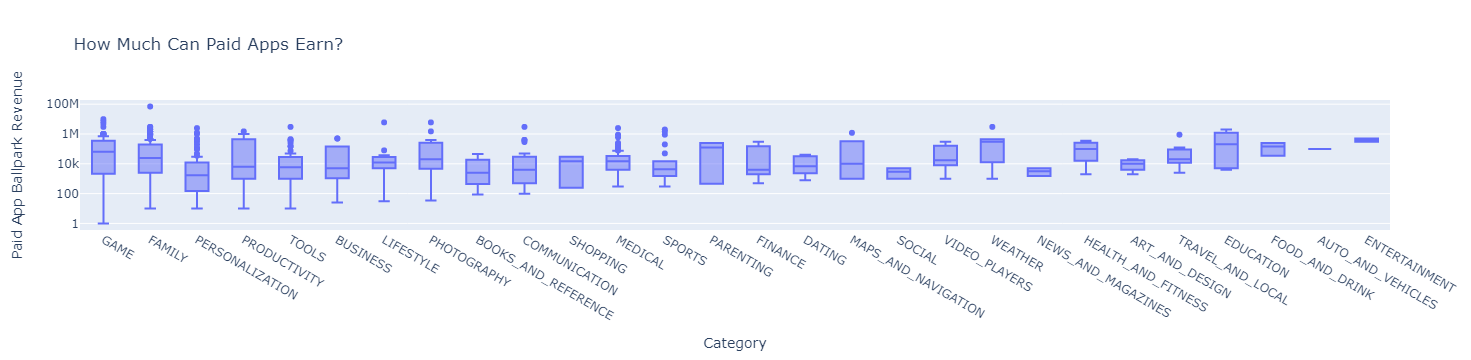

In [47]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
g_box1 = px.box(df_paid_apps, x='Category', y='Revenue_Estimate', title='How Much Can Paid Apps Earn?')

g_box1.update_layout(xaxis_title='Category',  yaxis_title='Paid App Ballpark Revenue', xaxis={'categoryorder':'min ascending'}, yaxis=dict(type='log'))

g_box1.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

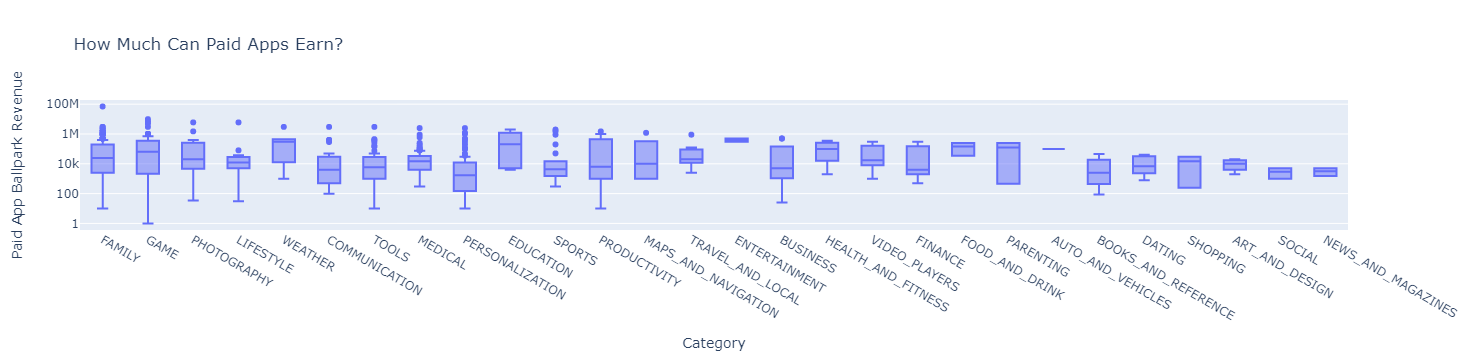

In [48]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
g_box1 = px.box(df_paid_apps, x='Category', y='Revenue_Estimate', title='How Much Can Paid Apps Earn?')

g_box1.update_layout(xaxis_title='Category',  yaxis_title='Paid App Ballpark Revenue', xaxis={'categoryorder':'max descending'}, yaxis=dict(type='log'))

g_box1.show()

In [49]:
df_paid_apps.Price.median()

2.99

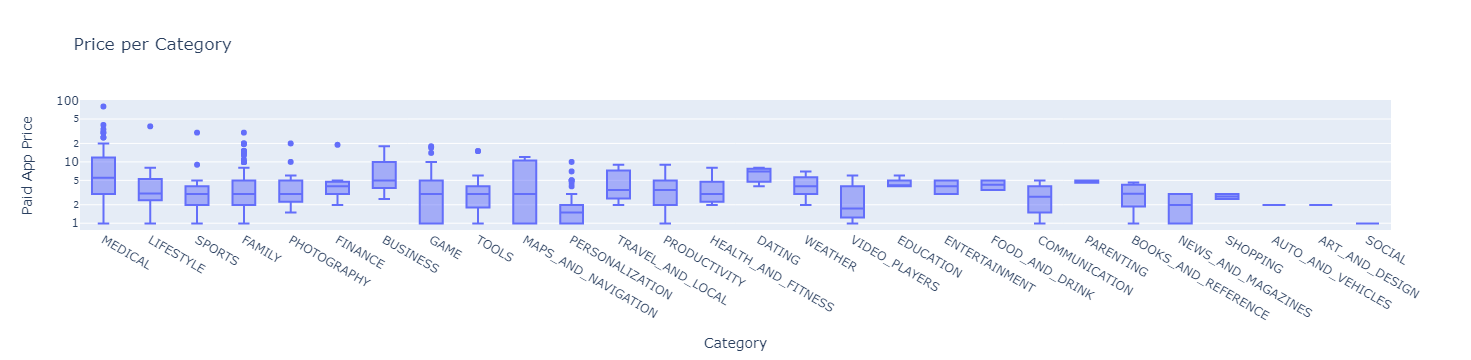

In [50]:
box = px.box(df_paid_apps, x='Category', y="Price", title='Price per Category')

box.update_layout(xaxis_title='Category', yaxis_title='Paid App Price', xaxis={'categoryorder':'max descending'}, yaxis=dict(type='log'))

box.show()